# Baseball Case Study

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [2]:
url = "https://raw.githubusercontent.com/FlipRoboTechnologies/ML_-Datasets/main/Baseball/baseball.csv"
data = pd.read_csv(url)


In [3]:
# Display the first few rows of the dataset
print(data.head())


    W    R    AB     H   2B  3B   HR   BB    SO   SB   RA   ER   ERA  CG  SHO  \
0  95  724  5575  1497  300  42  139  383   973  104  641  601  3.73   2    8   
1  83  696  5467  1349  277  44  156  439  1264   70  700  653  4.07   2   12   
2  81  669  5439  1395  303  29  141  533  1157   86  640  584  3.67  11   10   
3  76  622  5533  1381  260  27  136  404  1231   68  701  643  3.98   7    9   
4  74  689  5605  1515  289  49  151  455  1259   83  803  746  4.64   7   12   

   SV    E  
0  56   88  
1  45   86  
2  38   79  
3  37  101  
4  35   86  


In [4]:
# Check for missing values
print(data.isnull().sum())

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64


In [5]:
# Display information about the dataset
print(data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB
None


In [6]:
# Statistical summary of the dataset
print(data.describe())

                W           R           AB            H          2B  \
count   30.000000   30.000000    30.000000    30.000000   30.000000   
mean    80.966667  688.233333  5516.266667  1403.533333  274.733333   
std     10.453455   58.761754    70.467372    57.140923   18.095405   
min     63.000000  573.000000  5385.000000  1324.000000  236.000000   
25%     74.000000  651.250000  5464.000000  1363.000000  262.250000   
50%     81.000000  689.000000  5510.000000  1382.500000  275.500000   
75%     87.750000  718.250000  5570.000000  1451.500000  288.750000   
max    100.000000  891.000000  5649.000000  1515.000000  308.000000   

              3B          HR          BB          SO          SB          RA  \
count  30.000000   30.000000   30.000000    30.00000   30.000000   30.000000   
mean   31.300000  163.633333  469.100000  1248.20000   83.500000  688.233333   
std    10.452355   31.823309   57.053725   103.75947   22.815225   72.108005   
min    13.000000  100.000000  375.000000

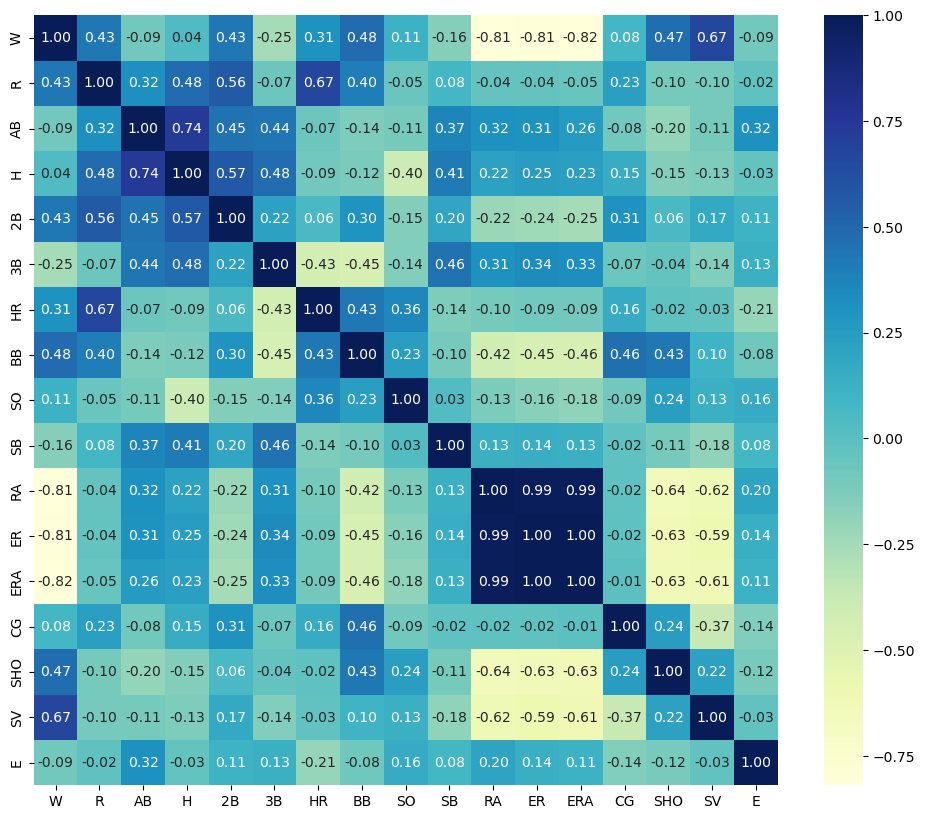

In [8]:
# Increase the size of the heatmap
plt.figure(figsize=(12, 10))

# Plot the heatmap
sns.heatmap(corr_matrix, annot=True, cmap="YlGnBu", fmt=".2f", annot_kws={"size": 10})

# Adjust the font size of the annotations
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show()


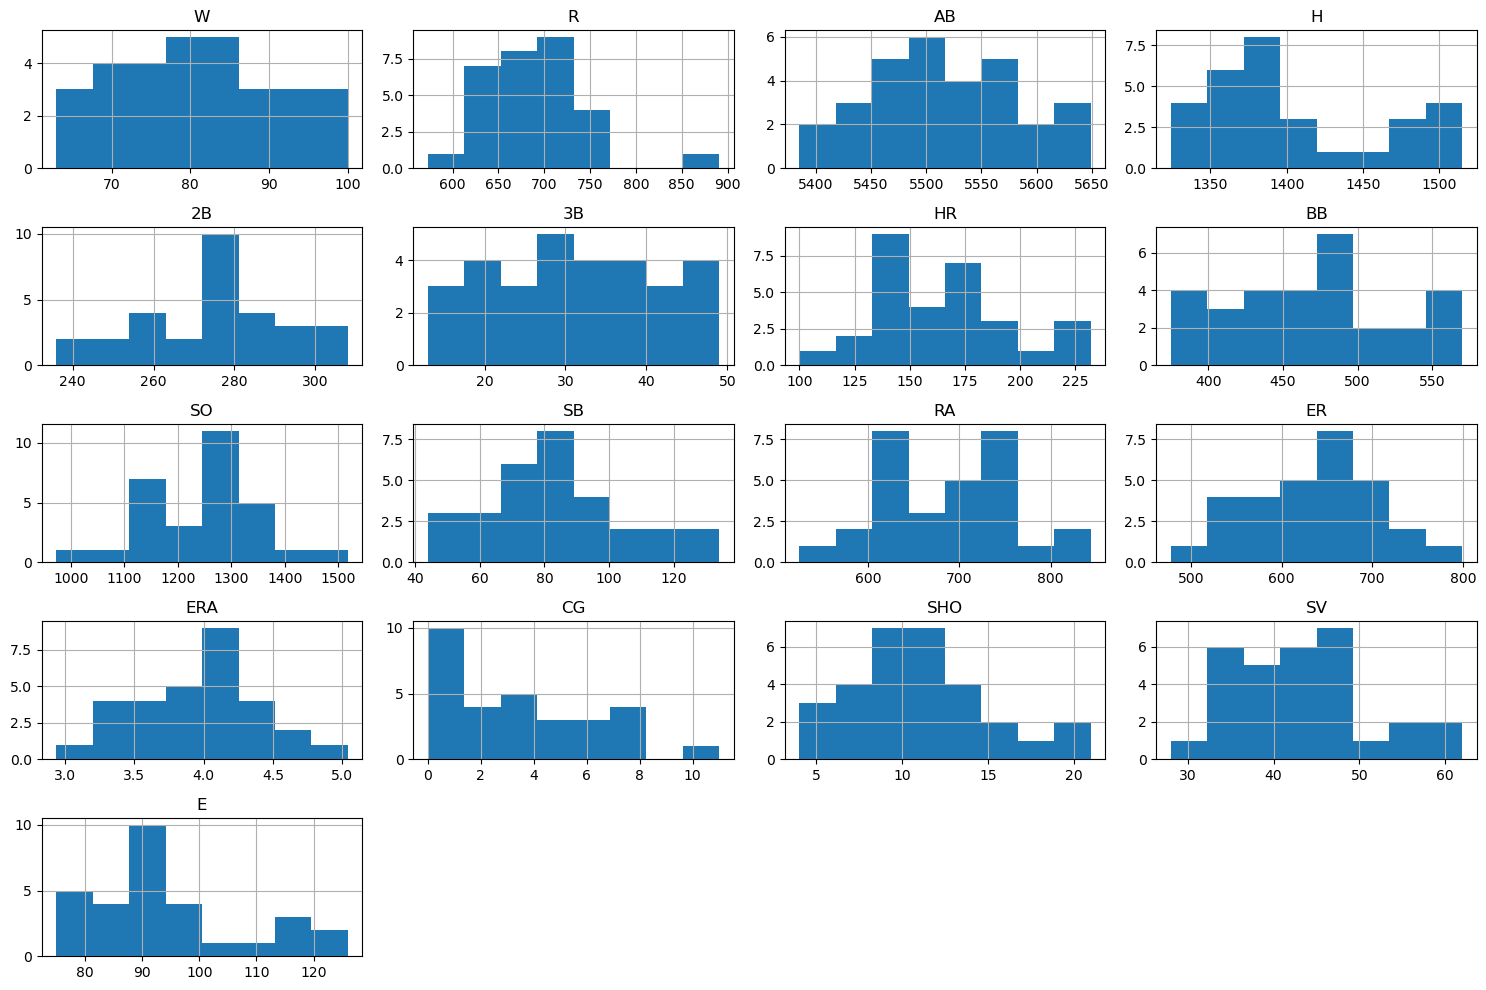

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame containing the baseball dataset

# Plot histograms for all columns in the DataFrame
data.hist(bins=8, figsize=(15, 10))  # Adjust figsize based on the number of features
plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()


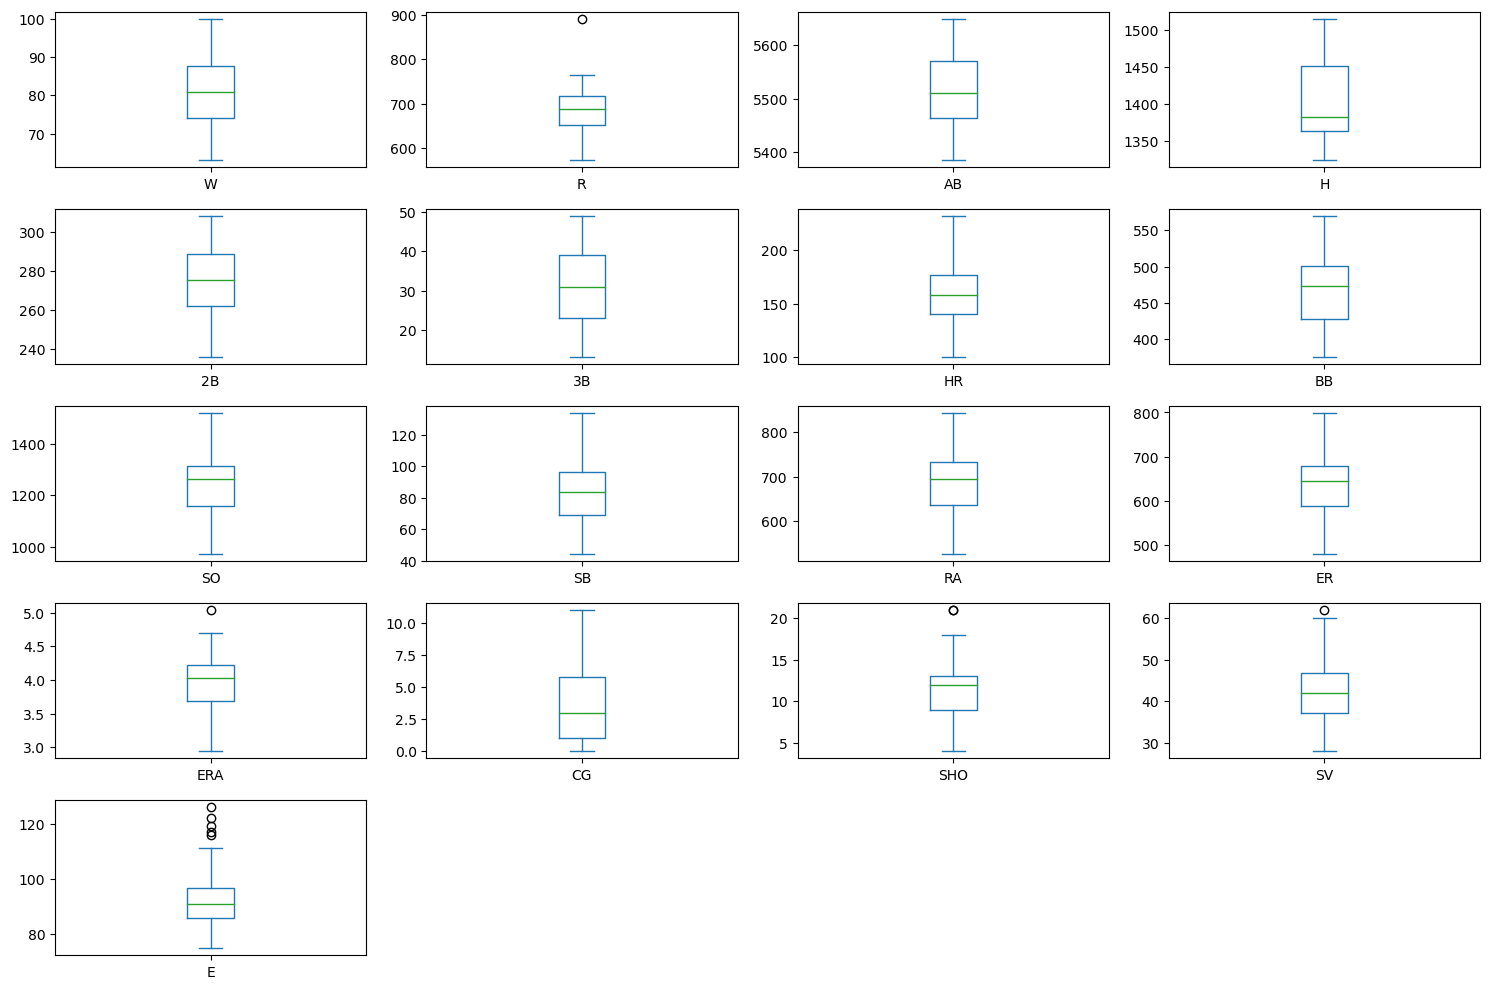

In [22]:
# Plot box plots for all columns in the DataFrame
data.plot(kind='box', subplots=True, layout=(5, 4), figsize=(15, 10))  # Adjust layout based on the number of features
plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

Correlation Heatmap between Features and Wins:



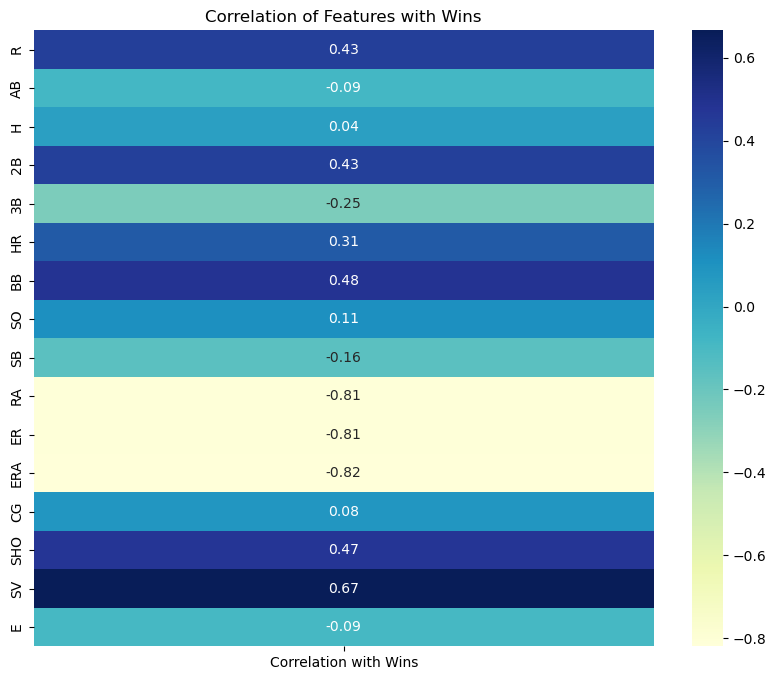

In [9]:
plt.figure(figsize=(10, 8))
corr_with_wins = data.corrwith(data['W'])
corr_with_wins = corr_with_wins.drop('W')  
sns.heatmap(pd.DataFrame(corr_with_wins, columns=['Correlation with Wins']), annot=True, cmap="YlGnBu", fmt=".2f")
plt.title('Correlation of Features with Wins')
plt.show()


Correlation Heatmap of Offensive Stats with Wins:

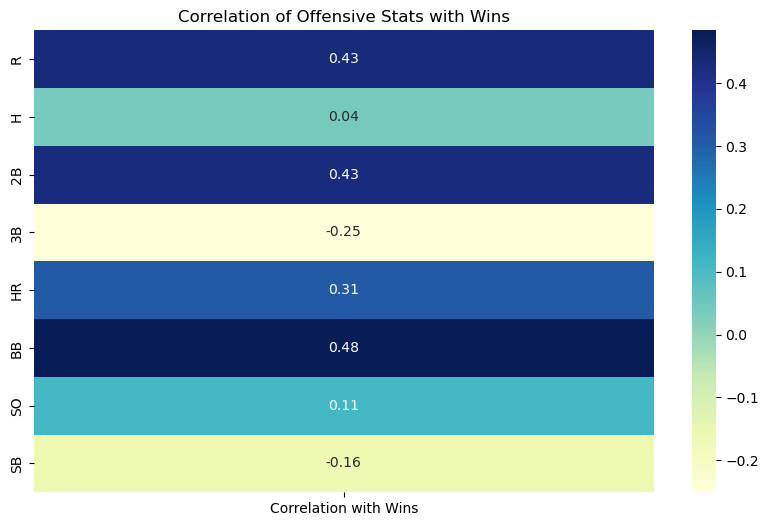

In [10]:
offensive_stats = ['R', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB']
offensive_corr = data[offensive_stats].corrwith(data['W'])
plt.figure(figsize=(10, 6))
sns.heatmap(pd.DataFrame(offensive_corr, columns=['Correlation with Wins']), annot=True, cmap="YlGnBu", fmt=".2f")
plt.title('Correlation of Offensive Stats with Wins')
plt.show()


Correlation Heatmap of Defensive Stats with Wins

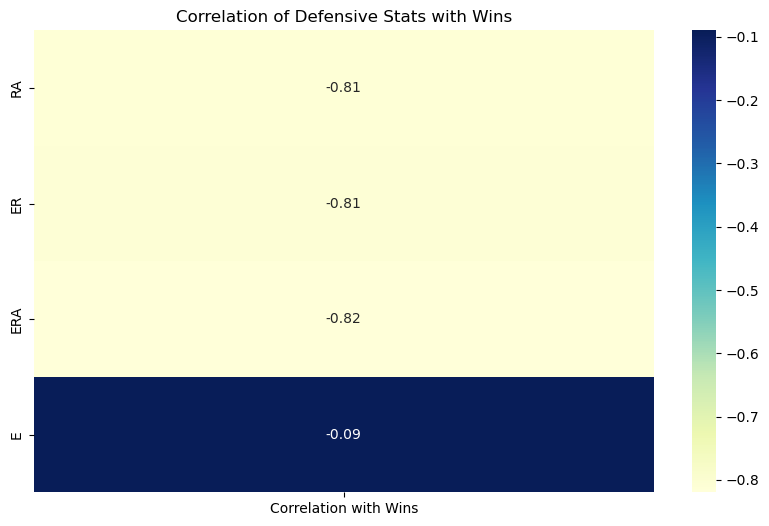

In [11]:
defensive_stats = ['RA', 'ER', 'ERA', 'E']
defensive_corr = data[defensive_stats].corrwith(data['W'])
plt.figure(figsize=(10, 6))
sns.heatmap(pd.DataFrame(defensive_corr, columns=['Correlation with Wins']), annot=True, cmap="YlGnBu", fmt=".2f")
plt.title('Correlation of Defensive Stats with Wins')
plt.show()


Data Splitting

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [8]:
url = "https://raw.githubusercontent.com/FlipRoboTechnologies/ML_-Datasets/main/Baseball/baseball.csv"
data = pd.read_csv(url)


In [11]:
from sklearn.model_selection import train_test_split

# Define input and output variables
X = data.drop('W', axis=1)  # Input features
y = data['W']                # Output variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


 Model Training


In [13]:
from sklearn.linear_model import LinearRegression

# Initialize the Linear Regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)


LinearRegression()

In [14]:
from sklearn.tree import DecisionTreeRegressor

# Initialize the Decision Tree Regressor model
dt_model = DecisionTreeRegressor()

# Train the Decision Tree model
dt_model.fit(X_train, y_train)


DecisionTreeRegressor()

In [15]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the Random Forest Regressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the Random Forest model
rf_model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [16]:
from sklearn.svm import SVR

# Initialize the Support Vector Machine Regressor model
svm_model = SVR(kernel='linear')

# Train the SVM model
svm_model.fit(X_train, y_train)


SVR(kernel='linear')

In [17]:
from sklearn.ensemble import GradientBoostingRegressor

# Initialize the Gradient Boosting Machine Regressor model
gbm_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

# Train the GBM model
gbm_model.fit(X_train, y_train)


GradientBoostingRegressor(random_state=42)

Model Evaluation

In [19]:
from sklearn.metrics import mean_squared_error, r2_score

# Make predictions
y_pred = model.predict(X_test)

# Model evaluation metrics
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R-squared:", r2_score(y_test, y_pred))


Mean Squared Error: 27.943032506667212
R-squared: 0.787640031614942
